#### Annotations Statistics Result for day of 1700301 plus metrics.txt

Purposes: Get a few key statistics value and their related values (max, min, mean, std, and var. etc) for a single day's run, and its related value such as:

1. avg procession length
2. avg homopolymer accuracy
3. num functional seq pores, etc

#### Step 1: Scan through all the succsussl runs daily for the annotations.h5;
#### Step 2: Find each statistics value using api call, such as: 
    neg_low, units = annos.get_rep_annotation('neg_low'), then neg_high_new.min(), etc
#### Step 3: Find other few values (these values can be found inside the metrics.txt file ase well, such as:
    num functional seq pores:       {num_functional_seq_pores}
    avg homopolymer edit accuracy:  {align_average_percent_identical_weighted_edit}
    avg procession length:          {avg_procession_length}
    N50 procession length:          {n50_statistic}
    total procession length:        {aggregate_base_count}
    ....
    "print avg_procession_length, unti = annos_data['avg_procession_length' ...."
##### Step 4: We can sort each column accordingly 

Future jobs will be looking for the exact cell and rep numbers for the each interested data point and look into the DVT...

In [200]:
# Libraries used:
%matplotlib inline
from  pandas import *
import pandas as pd
import matplotlib.pyplot as plt

import ac_analysis
from ac_analysis.model.annotations import load_from_h5

In [201]:
#pandas.set_printoptions(max_colwidth=100)
pd.options.display.max_colwidth = 20
from IPython.display import Image
#Image("img/picture.png")

In [202]:
import numpy
import matplotlib

from numpy import array, cos, linspace, mgrid, pi, sin, sqrt
from numpy.random import rand, randn
from matplotlib.pyplot import (clf, close, colorbar, figure, 
                               grid, hold, imshow, legend, 
                               plot, scatter, show, subplot, 
                               title, xlabel, ylabel, )
from matplotlib import cm
import matplotlib.pyplot as plt

%matplotlib inline

In [203]:
pwd

u'/home/genia/azhang/GPU_TEST_HOME/notebook'

In [204]:
# anno_stat_result_170216.csv
#anno_result = pd.read_csv('../result/anno_stat_result.csv', delimiter = ' ')
anno_result = pd.read_csv('../result/anno_stat_result_170301.csv', delimiter = ' ')
#anno_result = pd.read_csv('/mnt/AGZ_Home_vmwin10/workspace_pOD/genia/Andrew/GPU_TEST_HOME/result/anno_stat_result_170216.csv', delimiter = ' ')
print(anno_result)

               anno_path  1-neg_high_max  2-neg_high_min  3-neg_low_max  \
0    /home/genia/rigd...        3.658350        -35.0951      -0.025838   
1    /home/genia/rigd...        3.793870        -27.9815      -0.137254   
2    /home/genia/rigd...        9.492270        -26.7690       4.424740   
3    /home/genia/rigd...        5.465200        -27.4034       1.125990   
4    /home/genia/rigd...        5.788320        -30.0285       2.094890   
5    /home/genia/rigd...        8.925890        -32.4042       6.025340   
6    /home/genia/rigd...        2.135730        -31.8647      -2.036110   
7    /home/genia/rigd...       13.336700        -32.7920       8.447860   
8    /home/genia/rigd...       10.688900        -30.4410       6.742830   
9    /home/genia/rigd...        8.254830       -107.4230       6.254110   
10   /home/genia/rigd...       -2.770860        -36.9900      -5.769990   
11   /home/genia/rigd...       16.938600       -110.2460       5.984680   
12   /home/genia/rigd... 

In [205]:
pd.options.display.max_colwidth = 140
anno_result_df = DataFrame(anno_result)
anno_result_df.head()

,anno_path,1-neg_high_max,2-neg_high_min,3-neg_low_max,4-neg_low_min,5-pos_high_max,6-pos_high_min,7-pos_low_max,8-pos_low_min,9-num_functional_seq_pores,10-avg_homopolymer_edit_accuracy,11-avg_procession_length,12-N50_procession_length,13-total_procession_length,14-neg_low_mean,15-neg_low_std,16-neg_low_var
0,/home/genia/rigdata/aerodactyl/170301_TAG_02_aerodactyl_WAE22R13C08/P_00_170301233012_ggc3-keeper_ac-analysis_v11.23.0,3.65835,-35.0951,-0.025838,-41.0037,187.991,7.26962,165.870,-29.3709,3803,79.4230,1087,1412,3061382,-9.16297,2.84095,8.07098
1,/home/genia/rigdata/aerodactyl/170301_TAG_01_aerodactyl_WAE22R13C08/P_00_170301193638_ggc3-keeper_ac-analysis_v11.23.0,3.79387,-27.9815,-0.137254,-39.2504,187.495,-2.53262,163.380,-33.6579,2902,77.8596,791,1172,1555988,-9.71492,2.68518,7.21020
2,/home/genia/rigdata/aipom/170301_SIG-A_02_aipom_WAT09R04C13/P_00_170302041602_ggc3-keeper_ac-analysis_v11.23.0_oc.loss_lmm.p_dwell.p,9.49227,-26.7690,4.424740,-38.9769,172.510,14.11760,151.838,-28.7079,9,72.2767,676,1779,3384,-9.27870,4.14080,17.14620
3,/home/genia/rigdata/alakazam/170301_TAG_01_alakazam_WAE19R05C04/P_00_170301193831_s16pre-master_ac-analysis_v11.23.0,5.46520,-27.4034,1.125990,-36.0376,187.965,14.41710,164.873,-16.3508,1949,72.2889,762,1158,1058950,-8.76405,3.20814,10.29220
4,/home/genia/rigdata/ash/170301_SIG-A_02_ash_WAT08R03C08/P_00_170302041551_ggc3-keeper_ac-analysis_v11.23.0_oc.loss_lmm.p_dwell.p,5.78832,-30.0285,2.094890,-43.5807,174.167,9.28314,163.979,-27.5162,4,44.4990,237,321,711,-11.83870,4.10144,16.82180


## 1. Top Five neg_high_max runs

In [206]:
anno_result_df.sort(['1-neg_high_max'], ascending=[False]).head(n=5)

,anno_path,1-neg_high_max,2-neg_high_min,3-neg_low_max,4-neg_low_min,5-pos_high_max,6-pos_high_min,7-pos_low_max,8-pos_low_min,9-num_functional_seq_pores,10-avg_homopolymer_edit_accuracy,11-avg_procession_length,12-N50_procession_length,13-total_procession_length,14-neg_low_mean,15-neg_low_std,16-neg_low_var
97,/home/genia/rigdata/koffing/170301_ENG-SYS_01_koffing_WAL07R12C08/P_00_170301204940_s16pre-master_ac-analysis_v11.23.0,149.8280,-10.2739,148.8280,-74.8415,153.779,-5.17893,151.818,-66.6751,0,NaN,-1,-1,0,-1.2497,5.92674,35.1262
132,/home/genia/rigdata/nidoqueen/170301_ENG-BIE_02_nidoqueen_WAL07R07C08/P_00_170302005028_s16pre-master_ac-analysis_v11.23.0,50.5277,-70.8445,47.0799,-120.1860,126.513,2.81033,100.111,-61.4565,32217,76.6740,926,1476,20737759,-40.1704,6.03892,36.4686
188,/home/genia/rigdata/tangela/170301_ENG-BIE_01_tangela_WAL07R07C04/P_00_170301202215_s16pre-master_ac-analysis_v11.23.0,50.2376,-103.1180,47.9790,-122.3810,167.002,-1.41222,152.084,-72.4299,32975,77.9928,760,1190,16607534,-37.1240,9.56364,91.4632
130,/home/genia/rigdata/nidoking/170301_ENG-BIE_02_nidoking_WAL08R05C04/P_00_170302003452_ggc3-keeper_ac-analysis_v11.23.0,45.9037,-66.7984,17.8310,-124.7820,119.896,10.85510,100.975,-73.0969,38823,77.5487,762,1156,17582533,-38.7727,5.61299,31.5057
177,/home/genia/rigdata/sudowoodo/170301_ENG-SYS_04_sudowoodo_WAS21R10C07_cycle10/P_00_170302052654_s16pre-master_ac-analysis_v11.23.0,44.1533,-89.9946,10.8057,-138.2550,144.495,7.40061,126.803,-48.9839,2,67.2098,114,161,228,-40.1942,31.68820,1004.1400


(array([ 159.,   41.,    5.,    5.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  -4.94277 ,   10.534307,   26.011384,   41.488461,   56.965538,
          72.442615,   87.919692,  103.396769,  118.873846,  134.350923,
         149.828   ]),
 <a list of 10 Patch objects>)

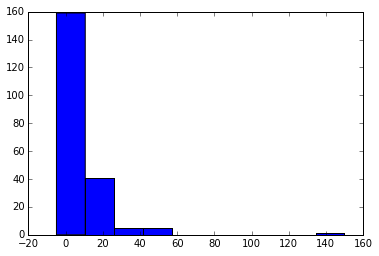

In [207]:
# plot
neg_high_max_array = anno_result_df['1-neg_high_max']
neg_high_max_array = neg_high_max_array[~np.isnan(neg_high_max_array)]
plt.hist(neg_high_max_array)

In [208]:
neg_high_max_array.size

211

In [209]:
neg_high_max = anno_result_df['1-neg_high_max'].max()
neg_high_max

149.828

### Try to plot the num_functional_seq_pores

(array([ 104.,    8.,   20.,   17.,   19.,   20.,   15.,    5.,    2.,    1.]),
 array([     0. ,   6700.2,  13400.4,  20100.6,  26800.8,  33501. ,
         40201.2,  46901.4,  53601.6,  60301.8,  67002. ]),
 <a list of 10 Patch objects>)

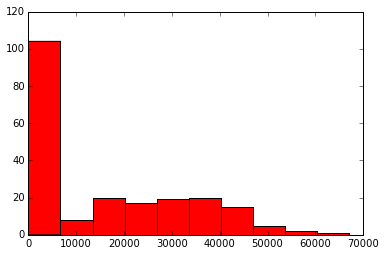

In [210]:
# Plot the num_functional_seq_pores
num_functional_seq_pores_array = anno_result_df['9-num_functional_seq_pores']
num_functional_seq_pores_array = num_functional_seq_pores_array[~np.isnan(num_functional_seq_pores_array)]
plt.hist(num_functional_seq_pores_array, color='r')


In [211]:
# Sort the "num_functional_seq_pores"
anno_result_df.sort(['9-num_functional_seq_pores'], ascending=[False]).head(n=5)

,anno_path,1-neg_high_max,2-neg_high_min,3-neg_low_max,4-neg_low_min,5-pos_high_max,6-pos_high_min,7-pos_low_max,8-pos_low_min,9-num_functional_seq_pores,10-avg_homopolymer_edit_accuracy,11-avg_procession_length,12-N50_procession_length,13-total_procession_length,14-neg_low_mean,15-neg_low_std,16-neg_low_var
51,/home/genia/rigdata/ekans/170301_ENG-BIE_01_ekans_WAS22R07C13/P_00_170301202437_ggc3-keeper_ac-analysis_v11.23.0,13.54330,-98.6416,11.272300,-112.006,151.602,-1.10912,140.450,-63.9692,67002,78.3906,1293,1871,55779287,-23.6607,4.94269,24.4301
76,/home/genia/rigdata/gyarados/170301_ENG-BIE_01_gyarados_WAS22R09C14/P_00_170301202448_ggc3-keeper_ac-analysis_v11.23.0,7.04897,-102.6120,4.611780,-123.803,154.433,-2.95607,148.046,-60.3674,59520,78.3555,1276,1869,49084402,-25.4117,5.34725,28.5930
106,/home/genia/rigdata/magikarp/170301_ENG-BIE_01_magikarp_WAS22R11C17/P_00_170301201901_s16pre-master_ac-analysis_v11.23.0,33.48790,-102.3320,28.496200,-122.493,162.713,-15.99910,147.526,-63.7381,55130,78.2098,1259,1887,45850965,-24.5069,6.72910,45.2808
22,/home/genia/rigdata/cleffa/170301_ENG-SYS_01_cleffa_WAU07R11C07_cycle07/P_00_170302102607_s16pre-master_ac-analysis_v11.23.0_oc.loss_lmm...,4.12856,-96.7795,-0.830888,-112.348,145.331,-3.13134,121.820,-68.3500,51663,77.4361,446,623,19879184,-28.6408,6.34029,40.1993
75,/home/genia/rigdata/gyarados/170301_ENG-BIE_02_gyarados_WAS22R09C14/P_00_170302003139_ggc3-keeper_ac-analysis_v11.23.0,12.84050,-101.8030,9.985200,-126.029,158.312,-6.00427,142.384,-61.0357,50775,78.0068,1336,1973,43561903,-24.4200,6.41756,41.1851


## 2. Top Five neg_high_min runs

In [212]:
anno_result_df.sort(['2-neg_high_min'], ascending=[True]).head(n=5)

,anno_path,1-neg_high_max,2-neg_high_min,3-neg_low_max,4-neg_low_min,5-pos_high_max,6-pos_high_min,7-pos_low_max,8-pos_low_min,9-num_functional_seq_pores,10-avg_homopolymer_edit_accuracy,11-avg_procession_length,12-N50_procession_length,13-total_procession_length,14-neg_low_mean,15-neg_low_std,16-neg_low_var
33,/home/genia/rigdata/dragonite/170301_PEG-PORE_01_dragonite_WAE22R06C15/P_00_170301212008_ggc3-keeper_ac-analysis_v11.23.0,15.28770,-128.451,13.91290,-131.222,157.814,1.721530,150.674,-61.5648,0,NaN,-1,-1,0,-22.8815,16.48320,271.6960
11,/home/genia/rigdata/blastoise/170301_SIG-A_02_blastoise_WAT10R04C13/P_00_170301234504_ggc3-keeper_ac-analysis_v11.23.0_oc.loss_lmm.p_dwe...,16.93860,-110.246,5.98468,-130.611,152.528,-0.217317,147.249,-68.7786,4188,73.5726,102,113,261458,-56.5967,19.57420,383.1490
109,/home/genia/rigdata/mareep/170301_PEG-PORE_01_mareep_WAE22R13C11/P_00_170301213119_ggc5-keeper_ac-analysis_v11.23.0,9.89164,-109.988,7.49419,-130.135,158.841,-6.047350,147.755,-60.7973,1,NaN,-1,-1,0,-44.5749,14.47570,209.5450
206,/home/genia/rigdata/wobbuffet/170301_ENG-SYS_01_wobbuffet_WAU07R03C10_cycle08/P_00_170302074305_ggc3-keeper_ac-analysis_v11.23.0_oc.loss...,-1.17732,-109.292,-2.17748,-120.833,137.978,-0.331074,131.745,-56.9254,2517,77.9177,438,600,954294,-34.6258,9.29410,86.3803
116,/home/genia/rigdata/miltank/170301_ENG-SYS_01_miltank_WAU07R11C12_cycle01/P_00_170302012412_s16pre-master_ac-analysis_v11.23.0_oc.loss_l...,14.47840,-108.112,12.82550,-113.727,142.460,-2.898020,131.431,-63.8323,24116,77.6271,403,548,7836009,-35.0925,9.09965,82.8036


(array([ 159.,   41.,    5.,    5.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  -4.94277 ,   10.534307,   26.011384,   41.488461,   56.965538,
          72.442615,   87.919692,  103.396769,  118.873846,  134.350923,
         149.828   ]),
 <a list of 10 Patch objects>)

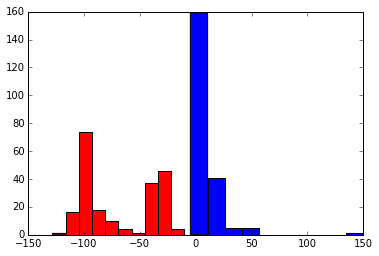

In [213]:
# plot
neg_high_min_array = anno_result_df['2-neg_high_min']
neg_high_min_array = neg_high_min_array[~np.isnan(neg_high_min_array)]
plt.hist(neg_high_min_array, color='r')
plt.hist(neg_high_max_array)

(array([  1.,  16.,  74.,  18.,  10.,   4.,   1.,  37.,  46.,   4.]),
 array([-128.451  , -116.63329, -104.81558,  -92.99787,  -81.18016,
         -69.36245,  -57.54474,  -45.72703,  -33.90932,  -22.09161,
         -10.2739 ]),
 <a list of 10 Patch objects>)

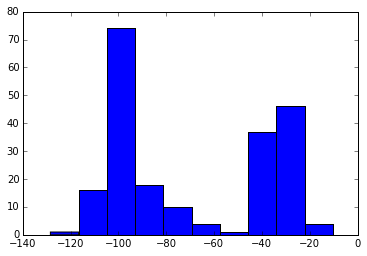

In [214]:
plt.hist(neg_high_min_array)

In [215]:
neg_high_min = anno_result_df['2-neg_high_min'].min()
neg_high_min

-128.45099999999999

## 3. Top Five neg_low_max runs

In [216]:
pd.options.display.max_colwidth = 150
anno_result_df.sort(['3-neg_low_max'], ascending=[False]).head(n=5)

,anno_path,1-neg_high_max,2-neg_high_min,3-neg_low_max,4-neg_low_min,5-pos_high_max,6-pos_high_min,7-pos_low_max,8-pos_low_min,9-num_functional_seq_pores,10-avg_homopolymer_edit_accuracy,11-avg_procession_length,12-N50_procession_length,13-total_procession_length,14-neg_low_mean,15-neg_low_std,16-neg_low_var
97,/home/genia/rigdata/koffing/170301_ENG-SYS_01_koffing_WAL07R12C08/P_00_170301204940_s16pre-master_ac-analysis_v11.23.0,149.8280,-10.2739,148.8280,-74.8415,153.779,-5.178930,151.818,-66.6751,0,NaN,-1,-1,0,-1.2497,5.92674,35.1262
188,/home/genia/rigdata/tangela/170301_ENG-BIE_01_tangela_WAL07R07C04/P_00_170301202215_s16pre-master_ac-analysis_v11.23.0,50.2376,-103.1180,47.9790,-122.3810,167.002,-1.412220,152.084,-72.4299,32975,77.9928,760,1190,16607534,-37.1240,9.56364,91.4632
132,/home/genia/rigdata/nidoqueen/170301_ENG-BIE_02_nidoqueen_WAL07R07C08/P_00_170302005028_s16pre-master_ac-analysis_v11.23.0,50.5277,-70.8445,47.0799,-120.1860,126.513,2.810330,100.111,-61.4565,32217,76.6740,926,1476,20737759,-40.1704,6.03892,36.4686
105,/home/genia/rigdata/magikarp/170301_ENG-BIE_02_magikarp_WAS22R11C17/P_00_170302002917_ggc3-keeper_ac-analysis_v11.23.0,43.1392,-104.9290,39.6075,-121.5120,193.083,-9.267170,178.758,-59.9355,49081,78.3038,1342,1966,44130867,-27.2493,8.47693,71.8583
19,/home/genia/rigdata/chikorita/170301_ENG-BIE_02_chikorita_WAL07R07C13/P_00_170302003603_s16pre-master_ac-analysis_v11.23.0,35.8213,-71.6306,29.0983,-117.2860,123.486,-0.870244,104.245,-67.9089,31979,78.1144,775,1198,16548713,-39.5775,6.20898,38.5514


(array([ 118.,   80.,    9.,    3.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([ -14.046 ,    2.2414,   18.5288,   34.8162,   51.1036,   67.391 ,
          83.6784,   99.9658,  116.2532,  132.5406,  148.828 ]),
 <a list of 10 Patch objects>)

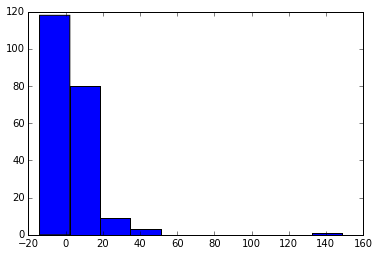

In [217]:
# plot
neg_low_max_array = anno_result_df['3-neg_low_max']
neg_low_max_array = neg_low_max_array[~np.isnan(neg_low_max_array)]
plt.hist(neg_low_max_array)

In [218]:
neg_low_max = anno_result_df['3-neg_low_max'].max()
neg_low_max

148.828

## 4. Top Five neg_low_min runs

In [219]:
anno_result_df.sort(['4-neg_low_min'], ascending=[True]).head(n=5)

,anno_path,1-neg_high_max,2-neg_high_min,3-neg_low_max,4-neg_low_min,5-pos_high_max,6-pos_high_min,7-pos_low_max,8-pos_low_min,9-num_functional_seq_pores,10-avg_homopolymer_edit_accuracy,11-avg_procession_length,12-N50_procession_length,13-total_procession_length,14-neg_low_mean,15-neg_low_std,16-neg_low_var
9,/home/genia/rigdata/blastoise/170301_SIG-A_01_blastoise_WAT10R04C13/P_00_170301223403_ggc3-keeper_ac-analysis_v11.23.0_oc.loss_lmm.p_dwell.p,8.25483,-107.4230,6.25411,-148.855,167.200,-2.06754,150.577,-69.3536,3700,74.2965,153,175,400263,-50.6369,18.85880,355.6540
110,/home/genia/rigdata/marowak/170301_ENG-BIE_01_marowak_WAL08R05C10/P_00_170301201510_s16pre-master_ac-analysis_v11.23.0,10.78840,-100.5990,6.13594,-144.329,148.707,-2.02460,138.245,-75.6376,33582,74.9737,949,1413,20605008,-35.2547,7.75571,60.1510
197,/home/genia/rigdata/vileplume/170301_ENG-BIE_01_vileplume_WAL08R06C13/P_00_170301201059_s16pre-master_ac-analysis_v11.23.0,24.70730,-101.9050,15.92100,-138.997,151.071,1.82090,144.581,-63.4778,7457,78.2824,822,1258,3552150,-37.4528,9.93644,98.7329
129,/home/genia/rigdata/nidoking/170301_ENG-BIE_01_nidoking_WAL08R05C04/P_00_170301201912_ggc3-keeper_ac-analysis_v11.23.0,20.95450,-104.8400,18.56940,-138.343,162.972,-0.27228,147.883,-73.4758,40622,78.1462,711,1115,17657076,-35.0083,9.25700,85.6920
177,/home/genia/rigdata/sudowoodo/170301_ENG-SYS_04_sudowoodo_WAS21R10C07_cycle10/P_00_170302052654_s16pre-master_ac-analysis_v11.23.0,44.15330,-89.9946,10.80570,-138.255,144.495,7.40061,126.803,-48.9839,2,67.2098,114,161,228,-40.1942,31.68820,1004.1400


(array([  6.,  16.,  54.,  45.,   5.,   3.,   1.,  20.,  55.,   6.]),
 array([-148.855  , -136.10147, -123.34794, -110.59441,  -97.84088,
         -85.08735,  -72.33382,  -59.58029,  -46.82676,  -34.07323,
         -21.3197 ]),
 <a list of 10 Patch objects>)

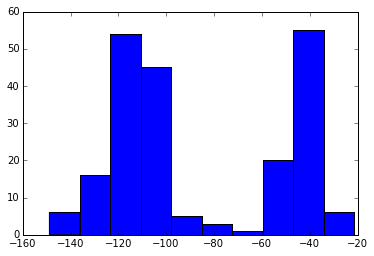

In [220]:
# plot
neg_low_min_array = anno_result_df['4-neg_low_min']
neg_low_min_array = neg_low_min_array[~np.isnan(neg_low_min_array)]
plt.hist(neg_low_min_array)

In [221]:
neg_low_min = anno_result_df['4-neg_low_min'].min()
neg_low_min

-148.85499999999999

## 5. Top five pos_high_max


In [222]:
anno_result_df.sort(['5-pos_high_max'], ascending=[False]).head(n=5)

,anno_path,1-neg_high_max,2-neg_high_min,3-neg_low_max,4-neg_low_min,5-pos_high_max,6-pos_high_min,7-pos_low_max,8-pos_low_min,9-num_functional_seq_pores,10-avg_homopolymer_edit_accuracy,11-avg_procession_length,12-N50_procession_length,13-total_procession_length,14-neg_low_mean,15-neg_low_std,16-neg_low_var
165,/home/genia/rigdata/spearow/170301_ENG-BIE_02_spearow_WAS24R09C12/P_00_170302004517_s16pre-master_ac-analysis_v11.23.0,30.562100,-97.8500,27.19330,-127.7530,201.608,-5.09494,189.086,-71.5044,46260,77.9157,1365,1994,37257478,-26.20590,9.09660,82.74810
147,/home/genia/rigdata/ratatta/170301_TAG_03_ratatta_WAS21R05C15/P_00_170301232226_ggc3-keeper_ac-analysis_v11.23.0,7.294580,-26.6167,3.30328,-42.1173,200.771,14.18380,170.597,-32.8547,3624,77.9704,949,1360,2500680,-6.91184,2.59893,6.75444
128,/home/genia/rigdata/mrmime/170301_PEG-POL_01_mrmime_WAS24R07C09/P_00_170301235525_s16pre-master_ac-analysis_v11.23.0,13.903500,-30.7073,10.50730,-46.0746,199.442,1.45115,178.353,-54.0092,10042,72.5501,935,1451,5477683,-1.15072,1.79977,3.23918
20,/home/genia/rigdata/clefairy/170301_TAG_01_clefairy_WAS21R10C03/P_00_170301193251_s16-master_ac-analysis_v11.23.0,0.977749,-29.2378,-2.08972,-41.0548,198.563,7.22510,179.068,-32.6068,2308,76.0642,969,1307,1559369,-10.81810,2.86512,8.20889
148,/home/genia/rigdata/ratatta/170301_TAG_02_ratatta_WAS21R05C15/P_00_170301193852_s16-master_ac-analysis_v11.23.0,7.560560,-27.1637,1.60134,-35.2333,197.876,15.71020,188.235,-2.8370,0,NaN,-1,-1,0,-8.66824,3.54436,12.56250


(array([  1.,   0.,   3.,   4.,   8.,  77.,  26.,  10.,  23.,  59.]),
 array([  61.5783 ,   75.58127,   89.58424,  103.58721,  117.59018,
         131.59315,  145.59612,  159.59909,  173.60206,  187.60503,  201.608  ]),
 <a list of 10 Patch objects>)

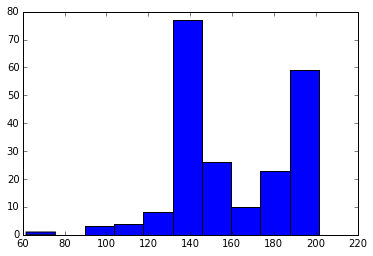

In [223]:
# plot
pos_high_max_array = anno_result_df['5-pos_high_max']
pos_high_max_array = pos_high_max_array[~np.isnan(pos_high_max_array)]
plt.hist(pos_high_max_array)

In [224]:
pos_high_max = anno_result_df['5-pos_high_max'].max()
pos_high_max

201.608

## 6. Top five pos_high_min

In [225]:
anno_result_df.sort(['6-pos_high_min'], ascending=[True]).head(n=5)

,anno_path,1-neg_high_max,2-neg_high_min,3-neg_low_max,4-neg_low_min,5-pos_high_max,6-pos_high_min,7-pos_low_max,8-pos_low_min,9-num_functional_seq_pores,10-avg_homopolymer_edit_accuracy,11-avg_procession_length,12-N50_procession_length,13-total_procession_length,14-neg_low_mean,15-neg_low_std,16-neg_low_var
179,/home/genia/rigdata/sunkern/170301_ENG-SYS_01_sunkern_WAU07R09C15_cycle10/P_00_170302122110_s16pre-master_ac-analysis_v11.23.0_oc.loss_lmm.p_dwell.p,14.70380,-83.5917,11.78390,-116.252,133.332,-30.6725,114.052,-63.8149,1880,75.3468,437,606,661945,-30.4424,10.67350,113.9230
117,/home/genia/rigdata/miltank/170301_ENG-SYS_01_miltank_WAU07R11C12_cycle08/P_00_170302102810_ggc3-keeper_ac-analysis_v11.23.0_oc.loss_lmm.p_dwell.p,5.41468,-95.6395,-0.06311,-106.734,132.767,-28.9999,115.136,-68.5877,24988,76.8351,404,553,8506676,-32.6589,8.47993,71.9092
205,/home/genia/rigdata/wobbuffet/170301_ENG-SYS_01_wobbuffet_WAU07R03C10_cycle07/P_00_170302064725_s16pre-master_ac-analysis_v11.23.0_oc.loss_lmm.p_d...,9.49340,-97.5212,7.33021,-113.994,134.214,-21.2382,122.564,-67.6256,10748,77.9759,515,693,4675034,-34.5509,8.27471,68.4708
167,/home/genia/rigdata/steelix/170301_PEG-PORE_01_steelix_WAU06R08C13/P_00_170301212359_s16pre-master_ac-analysis_v11.23.0,8.27408,-107.8740,2.62087,-127.192,176.314,-17.5166,147.189,-53.4315,1,NaN,-1,-1,0,-43.1899,14.03530,196.9890
106,/home/genia/rigdata/magikarp/170301_ENG-BIE_01_magikarp_WAS22R11C17/P_00_170301201901_s16pre-master_ac-analysis_v11.23.0,33.48790,-102.3320,28.49620,-122.493,162.713,-15.9991,147.526,-63.7381,55130,78.2098,1259,1887,45850965,-24.5069,6.72910,45.2808


(array([  2.,   1.,   4.,   5.,  89.,  39.,  40.,  27.,   3.,   1.]),
 array([-30.6725 , -24.52165, -18.3708 , -12.21995,  -6.0691 ,   0.08175,
          6.2326 ,  12.38345,  18.5343 ,  24.68515,  30.836  ]),
 <a list of 10 Patch objects>)

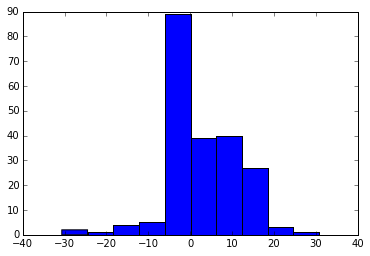

In [226]:
# plot
pos_high_min_array = anno_result_df['6-pos_high_min']
pos_high_min_array = pos_high_min_array[~np.isnan(pos_high_min_array)]
plt.hist(pos_high_min_array)

In [227]:
pos_high_min = anno_result_df['6-pos_high_min'].min()
pos_high_min

-30.672499999999999

## 7.  Top Five pos_low_max

In [228]:
anno_result_df.sort(['7-pos_low_max'], ascending=[False]).head(n=5)

,anno_path,1-neg_high_max,2-neg_high_min,3-neg_low_max,4-neg_low_min,5-pos_high_max,6-pos_high_min,7-pos_low_max,8-pos_low_min,9-num_functional_seq_pores,10-avg_homopolymer_edit_accuracy,11-avg_procession_length,12-N50_procession_length,13-total_procession_length,14-neg_low_mean,15-neg_low_std,16-neg_low_var
150,/home/genia/rigdata/sabrina/170301_TAG_01_sabrina_WAE22R09C02/P_00_170301193933_s16-master_ac-analysis_v11.23.0,5.993980,-31.1680,1.85083,-42.5218,191.337,-2.40491,189.335,-31.7903,3262,75.9468,794,1183,1901166,-6.90241,2.73555,7.48324
13,/home/genia/rigdata/butterfree/170301_TAG_01_butterfree_WAE22R09C15/P_00_170301193331_s16pre-master_ac-analysis_v11.23.0,8.579380,-24.8293,4.61826,-35.3403,197.564,11.79850,189.278,-35.2548,4511,77.9717,857,1268,2532004,-3.84945,2.55773,6.54198
165,/home/genia/rigdata/spearow/170301_ENG-BIE_02_spearow_WAS24R09C12/P_00_170302004517_s16pre-master_ac-analysis_v11.23.0,30.562100,-97.8500,27.19330,-127.7530,201.608,-5.09494,189.086,-71.5044,46260,77.9157,1365,1994,37257478,-26.20590,9.09660,82.74810
148,/home/genia/rigdata/ratatta/170301_TAG_02_ratatta_WAS21R05C15/P_00_170301193852_s16-master_ac-analysis_v11.23.0,7.560560,-27.1637,1.60134,-35.2333,197.876,15.71020,188.235,-2.8370,0,NaN,-1,-1,0,-8.66824,3.54436,12.56250
16,/home/genia/rigdata/caterpie/170301_TAG_01_caterpie_WAE22R08C15/P_00_170301194716_s16pre-master_ac-analysis_v11.23.0,-0.297293,-41.5559,-4.26344,-46.3496,193.765,15.02520,187.359,-32.1828,4972,77.4345,841,1214,2999004,-11.67120,2.18177,4.76013


(array([  3.,   1.,   2.,   4.,   4.,  24.,  56.,  44.,  34.,  39.]),
 array([  10.6285 ,   28.49915,   46.3698 ,   64.24045,   82.1111 ,
          99.98175,  117.8524 ,  135.72305,  153.5937 ,  171.46435,  189.335  ]),
 <a list of 10 Patch objects>)

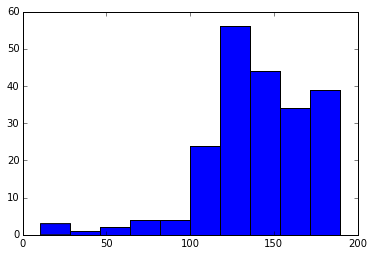

In [229]:
# plot
pos_low_max_array = anno_result_df['7-pos_low_max']
pos_low_max_array = pos_low_max_array[~np.isnan(pos_low_max_array)]
plt.hist(pos_low_max_array)

In [230]:
pos_low_max = anno_result_df['7-pos_low_max'].min()
pos_low_max

10.628500000000001

## 8. Top five pos_low_min

In [231]:
anno_result_df.sort(['8-pos_low_min'], ascending=[True]).head(n=5)

,anno_path,1-neg_high_max,2-neg_high_min,3-neg_low_max,4-neg_low_min,5-pos_high_max,6-pos_high_min,7-pos_low_max,8-pos_low_min,9-num_functional_seq_pores,10-avg_homopolymer_edit_accuracy,11-avg_procession_length,12-N50_procession_length,13-total_procession_length,14-neg_low_mean,15-neg_low_std,16-neg_low_var
153,/home/genia/rigdata/slowpoke/170301_ACTG_01_slowpoke_WAV07R05C15/P_00_170301200807_s16pre-master_ac-analysis_v11.23.0,13.92590,-45.1310,-2.64520,-102.198,112.991,8.183790,75.1577,-87.9681,0,NaN,-1,-1,0,-21.0760,4.45852,19.8784
28,/home/genia/rigdata/cleffa/170301_ENG-SYS_01_cleffa_WAU07R11C07_cycle03/P_00_170302043137_ggc3-keeper_ac-analysis_v11.23.0_oc.loss_lmm.p_dwell.p,7.07150,-90.7830,-3.61863,-109.696,133.471,-0.840069,123.5610,-80.4853,27070,77.6841,446,619,8748427,-31.3273,8.98213,80.6786
118,/home/genia/rigdata/miltank/170301_ENG-SYS_01_miltank_WAU07R11C12_cycle03/P_00_170302040458_s16pre-master_ac-analysis_v11.23.0_oc.loss_lmm.p_dwell.p,9.38068,-97.4879,7.84705,-109.442,145.513,-0.082382,128.5940,-76.2773,34029,77.7223,400,545,11537686,-32.4581,7.80601,60.9338
30,/home/genia/rigdata/cyndaquil/170301_ENG-BIE_01_cyndaquil_WAL07R07C12/P_00_170301201923_ggc3-keeper_ac-analysis_v11.23.0,18.94910,-105.0990,15.90110,-137.601,177.604,-1.129240,153.9110,-76.2158,41841,78.2249,763,1198,22396263,-36.2070,9.29937,86.4782
110,/home/genia/rigdata/marowak/170301_ENG-BIE_01_marowak_WAL08R05C10/P_00_170301201510_s16pre-master_ac-analysis_v11.23.0,10.78840,-100.5990,6.13594,-144.329,148.707,-2.024600,138.2450,-75.6376,33582,74.9737,949,1413,20605008,-35.2547,7.75571,60.1510


In [232]:
pos_low_min = anno_result_df['8-pos_low_min'].min()
pos_low_min

-87.968100000000007

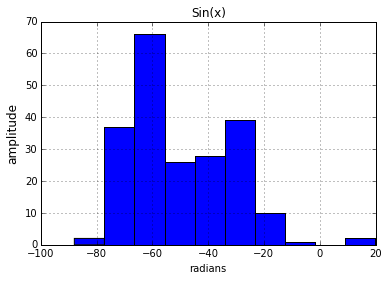

In [233]:
# plot
pos_low_min_array = anno_result_df['8-pos_low_min']
pos_low_min_array = pos_low_min_array[~np.isnan(pos_low_min_array)]
plt.hist(pos_low_min_array)
xlabel('radians')
ylabel('amplitude', fontsize='large')
title('Sin(x)')
grid()

# Final Summary

In [234]:
print "1-neg_high_max ", neg_high_max
print "2-neg_high_min ", neg_high_min

print "3-neg_low_max ", neg_low_max
print "4-neg_low_min ", neg_low_min

print "5-pos_high_max ", pos_high_max
print "6-pos_high_min ", pos_high_min

print "7-pos_low_max ", pos_low_max
print "8-pos_low_min ", pos_low_min


1-neg_high_max  149.828
2-neg_high_min  -128.451
3-neg_low_max  148.828
4-neg_low_min  -148.855
5-pos_high_max  201.608
6-pos_high_min  -30.6725
7-pos_low_max  10.6285
8-pos_low_min  -87.9681


### MISC 1: Sample to find the cell id and rep number based on above result
For example, the daily neg_low min value for today, which is from: 
170224_ENG-SYS_01_voltorb_WAL07R10C10/P_00_170224180735_s16-master_ac-analysis_v11.22.2/annotations.h5


In [292]:
# 1. Get the annos_path for the max neg_low
#anno_path = "/home/genia/rigdata/sudowoodo/170217_ENG-SYS_01_sudowoodo_WAS21R05C10_cycle06/\
#P_00_170218071431_s16-master_ac-analysis_v11.21.2_oc.loss_lmm.p_dwell.p/annotations.h5"

anno_path = "/home/genia/rigdata/koffing/170301_ENG-SYS_01_koffing_WAL07R12C08/\
P_00_170301204940_s16pre-master_ac-analysis_v11.23.0/annotations.h5"
annos = load_from_h5(anno_path)

In [279]:
# 2. 
cells = annos.cells
neg_low, units = annos.get_rep_annotation('neg_low')
neg_low.size

32768

In [280]:
# Find the indices for the maximum rep value.
max_neg_low = np.nanmax(neg_low)
cell_index, rep_number = np.where(neg_low == max_neg_low)
cell_id = cells[cell_index]
print "max_neg_low ",  max_neg_low
print('{}, {}'.format(cell_id, rep_number))

# Find the indices for the minimum rep value.
min_neg_low = np.nanmin(neg_low)
print "\nmin_neg_low ", min_neg_low
cell_index, rep_number = np.where(neg_low == min_neg_low)
cell_id = cells[cell_index]
print('{}, {}'.format(cell_id, rep_number))


max_neg_low  148.828
['b14c2378'], [0]

min_neg_low  -74.8415
['b09c5374'], [0]


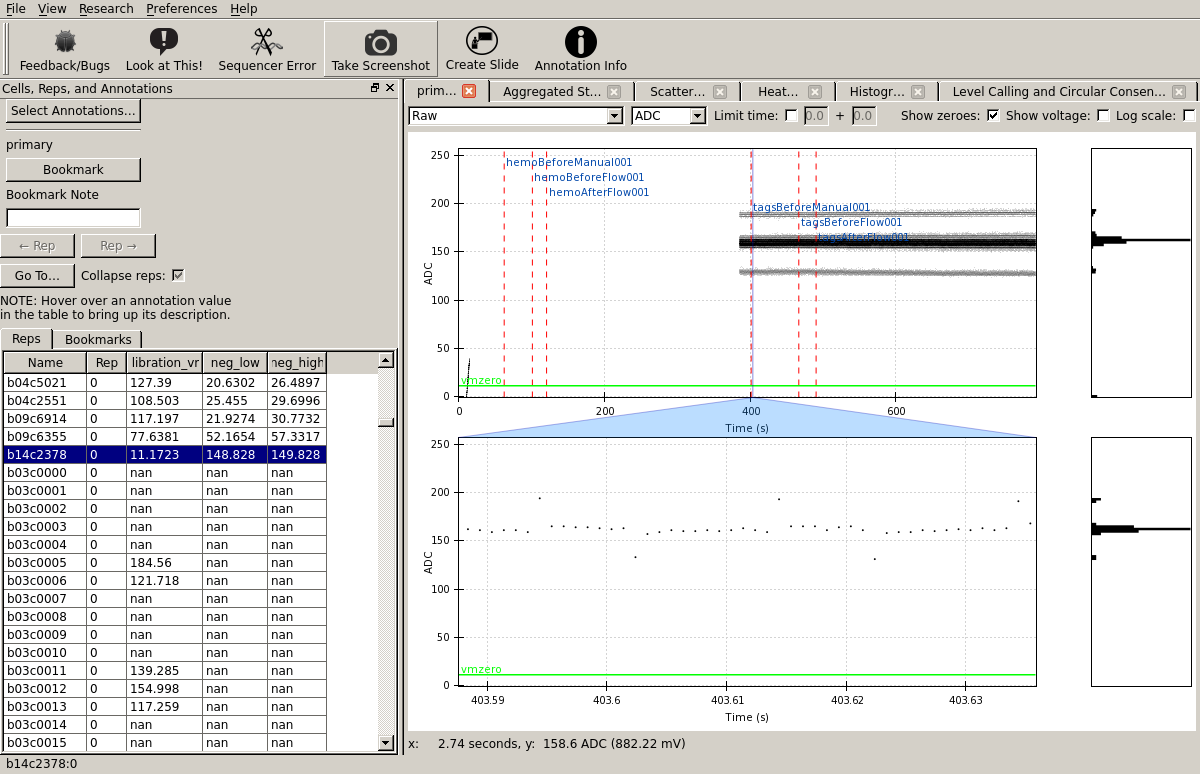

In [293]:
from IPython.display import Image
Image(filename='/home/genia/rigdata/koffing/170301_ENG-SYS_01_koffing_WAL07R12C08/DVT-b14c2378-00-20170303-192809.png')
#Image(filename='/home/genia/rigdata/koffing/170301_ENG-SYS_01_koffing_WAL07R12C08/DVT-b09c5374-00-20170303-192934.png')

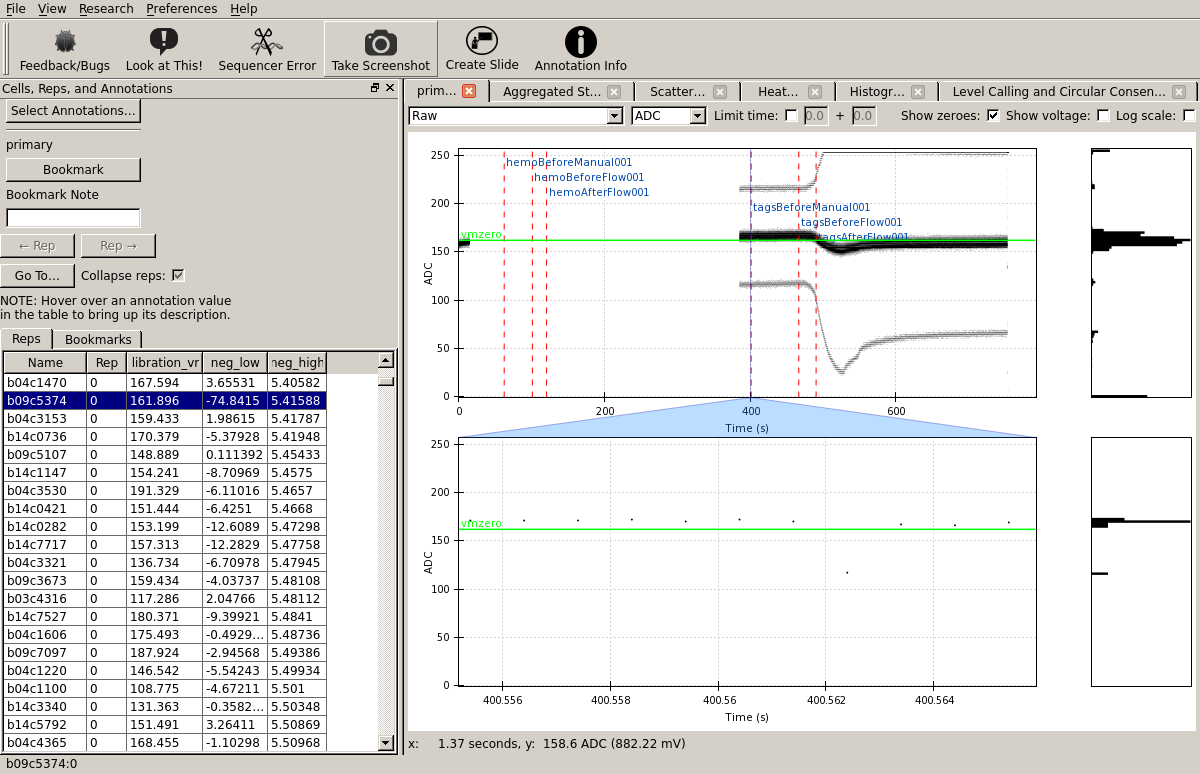

In [291]:
Image(filename='/home/genia/rigdata/koffing/170301_ENG-SYS_01_koffing_WAL07R12C08/DVT-b09c5374-00-20170303-192934.png')

# Re-run against 

Preparations:

1. 
/home/genia/azhang/170224_ENG-SYS_01_voltorb_WAL07R10C10/chunked_raw_data/bank09
(genia@crobat)\> extract-h5-dataset --cell b09c0534
Extracting from './raw/activethinning.h5' to '/home/genia/azhang/170224_ENG-SYS_01_voltorb_WAL07R10C10/chunked_raw_data/bank09/raw_extracted/activethinning.h5'

2. /home/genia/azhang/170224_ENG-SYS_01_voltorb_WAL07R10C10_cell
(genia@crobat)\>run-ac-pipeline -o P_b09c0534



In [286]:
anno_path = "/home/genia/rigdata/koffing/170301_ENG-SYS_01_koffing_WAL07R12C08/\
P_00_170301204940_s16pre-master_ac-analysis_v11.23.0/annotations.h5"
annos = load_from_h5(anno_path)

In [287]:
neg_low, units = annos.get_rep_annotation('neg_low') # Enthough enable us to grab neg_low matrix shape = (cells, reps)
print "neg_low ==> ",  neg_low, units
print "\nneg_low.shape ==> ", neg_low.shape
print "\nneg_low.size ==> ", neg_low.size # rows * columns

neg_low ==>  [[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]] ADC

neg_low.shape ==>  (32768, 1)

neg_low.size ==>  32768


In [288]:
neg_low_max = np.nanmax(neg_low)
neg_low_min = np.nanmin(neg_low)
print ("neg_low_max "), neg_low_max 

neg_low_max  148.828


In [289]:
neg_high, units = annos.get_rep_annotation('neg_high')
neg_high_max = np.nanmax(neg_low)
neg_low_min = np.nanmin(neg_low)
print ("neg_low_max "), neg_low_max

neg_low_max  148.828


### Verified !!!

In [ ]:
#Test
figure()
plt.hist(pos_low_min_array)
figure()
plt.hist(pos_low_max_array)


In [ ]:
subplot(4,2,1)
plt.hist(neg_high_max_array, label='neg_high_max')
legend()
subplot(4,2,2)
plt.hist(neg_high_min_array)

subplot(4,2,3)
plt.hist(neg_low_max_array)

subplot(4,2,4)
plt.hist(neg_low_min_array)

subplot(4,2,5)
plt.hist(pos_high_max_array)

subplot(4,2,6)
plt.hist(pos_high_min_array)

subplot(4,2,7)
plt.hist(pos_low_max_array)

subplot(4,2,8)
plt.hist(pos_low_min_array)

legend()


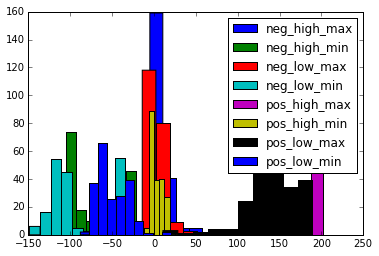

In [284]:
# All together:

plt.hist(neg_high_max_array, label='neg_high_max')
legend()
#subplot(4,2,2)
plt.hist(neg_high_min_array, label='neg_high_min')

#subplot(4,2,3)
plt.hist(neg_low_max_array, label='neg_low_max')

#subplot(4,2,4)
plt.hist(neg_low_min_array, label='neg_low_min')

#subplot(4,2,5)
plt.hist(pos_high_max_array, label='pos_high_max')

#subplot(4,2,6)
plt.hist(pos_high_min_array, label='pos_high_min')

#subplot(4,2,7)
plt.hist(pos_low_max_array, label='pos_low_max')

#subplot(4,2,8)
plt.hist(pos_low_min_array, label='pos_low_min')

legend()

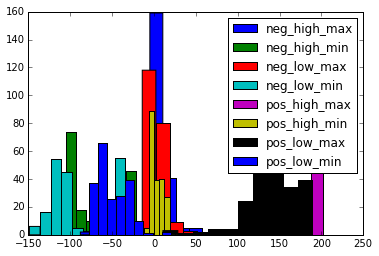

In [285]:
# All together:

plt.hist(neg_high_max_array)
plt.hist(neg_high_min_array)
plt.hist(neg_low_max_array)
plt.hist(neg_low_min_array)
plt.hist(pos_high_max_array)
plt.hist(pos_high_min_array)
plt.hist(pos_low_max_array)
plt.hist(pos_low_min_array)
legend(['neg_high_max', 'neg_high_min', 'neg_low_max','neg_low_min', 'pos_high_max',
        'pos_high_min', 'pos_low_max', 'pos_low_min' ])



In [ ]:
close()

In [ ]:
from scipy.misc import lena

In [ ]:
img = lena()

In [ ]:
from ggplot import *



In [ ]:
ggplot(data=anno_result_df, aes(x='pos_low_max', y='pos_low_max'))
#anno_result_df

In [ ]:
import rpy2.robjects as robj

In [ ]:
imshow(img)

In [ ]:
colorbar()

In [ ]:
import numpy as np
print np.zeros((3,5))[:,np.newaxis,:].shape

In [ ]:
print np.zeros((3,5))[:,np.newaxis,:].size

In [ ]:
x = np.zeros((3,5))[:,np.newaxis,:]
print x

In [ ]:
y = np.zeros((3,5))
y

In [ ]:
x = np.array([[1, 2, 3], [4, 5, 6], [7,8,9]])

In [ ]:
x

In [ ]:
np.ravel(x)
